In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

C:\Users\PokeG\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
price_new = pd.read_csv('Ames_Price_Preprocessed_Tree.csv')
price_new = price_new.loc[:, ~price_new.columns.isin(['Unnamed: 0'])]

In [3]:
price_new.shape

(2558, 69)

In [4]:
X = price_new.loc[:, ~price_new.columns.isin(['SalePrice'])]
y = price_new['SalePrice']

In [5]:
X.head()

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
0,70,1,5,126,457,1,3,3,1,0,...,2,145,3,3,2,0,0,0,0,51
1,197,11,5,18,134,1,3,3,1,4,...,1,48,3,3,2,0,93,0,0,0
2,160,1,1,36,236,1,3,3,1,4,...,1,21,3,1,0,109,0,16,1,0
3,188,6,5,56,509,1,3,3,1,0,...,1,57,3,3,0,0,0,93,0,16
4,701,5,5,46,561,1,3,3,1,4,...,2,259,3,3,2,0,35,0,0,0


In [6]:
y.head()

0    197
1    260
2    191
3    149
4    585
Name: SalePrice, dtype: int64

In [7]:
X.head()

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
0,70,1,5,126,457,1,3,3,1,0,...,2,145,3,3,2,0,0,0,0,51
1,197,11,5,18,134,1,3,3,1,4,...,1,48,3,3,2,0,93,0,0,0
2,160,1,1,36,236,1,3,3,1,4,...,1,21,3,1,0,109,0,16,1,0
3,188,6,5,56,509,1,3,3,1,0,...,1,57,3,3,0,0,0,93,0,16
4,701,5,5,46,561,1,3,3,1,4,...,2,259,3,3,2,0,35,0,0,0


In [8]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(missing_values = np.nan, n_neighbors = 5, weights = 'uniform', metric = 'nan_euclidean')
imputer.fit(X)
X[:] = imputer.transform(X)

<ipython-input-8-6d5d53b265d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[:] = imputer.transform(X)
<ipython-input-8-6d5d53b265d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[:] = imputer.transform(X)


In [9]:
X.head()

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
0,70,1,5,126,457,1,3,3,1,0,...,2,145,3,3,2,0,0,0,0,51
1,197,11,5,18,134,1,3,3,1,4,...,1,48,3,3,2,0,93,0,0,0
2,160,1,1,36,236,1,3,3,1,4,...,1,21,3,1,0,109,0,16,1,0
3,188,6,5,56,509,1,3,3,1,0,...,1,57,3,3,0,0,0,93,0,16
4,701,5,5,46,561,1,3,3,1,4,...,2,259,3,3,2,0,35,0,0,0


In [10]:
null_X = X.isnull().sum().to_frame()
null_X.T

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['feature'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif.T

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
feature,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
VIF,61.975552,11.38787,48.172985,5.085202,8.116102,310.73319,30.186336,39.539712,637.249062,5.339707,...,37.704875,16.977342,161.904558,180.367044,21.193319,1.986295,1.911312,1.415711,1.043323,1.207555


In [12]:
import math

multico = []
no_multico = []

for i in range(len(vif)):
  if math.isinf(vif['VIF'].iloc[i]) or vif['VIF'].iloc[i] > 5:
    multico.append(vif['feature'].iloc[i])
  else:
    no_multico.append(vif['feature'].iloc[i])

In [13]:
print(multico)

['GrLivArea', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive']


In [14]:
print(no_multico)

['LandSlope', 'RoofStyle', 'RoofMatl', 'MasVnrArea', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']


In [15]:
print(multico[0:16])
print('\n')
print(multico[17:])

['GrLivArea', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual']


['YearBuilt', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive']


In [16]:
multico_remove_1 = multico[1:32]
multico_remove_2 = multico[33:]

for i in multico_remove_1:
  X = X.loc[:, ~X.columns.isin([i])]

for i in multico_remove_2:
  X = X.loc[:, ~X.columns.isin([i])]

#for i in multico:
#  X = X.loc[:, ~X.columns.isin([i])]

In [17]:
vif = pd.DataFrame()
vif['feature'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
feature,GrLivArea,LandSlope,RoofStyle,RoofMatl,MasVnrArea,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,HalfBath,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
VIF,7.15088,1.106079,3.390573,1.060071,1.724784,3.094528,1.034972,1.904906,1.082141,2.057489,2.562982,1.772479,1.747018,1.163742,1.016129,1.151557


In [18]:
multico = []
no_multico = []

for i in range(len(vif)):
  if math.isinf(vif['VIF'].iloc[i]) or vif['VIF'].iloc[i] > 5:
    multico.append(vif['feature'].iloc[i])
  else:
    no_multico.append(vif['feature'].iloc[i])

In [19]:
print(multico)

['GrLivArea']


In [20]:
print(no_multico)

['LandSlope', 'RoofStyle', 'RoofMatl', 'MasVnrArea', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']


In [21]:
from sklearn.model_selection import train_test_split

#try:  # train_test_split was moved in 0.18.0
#    from sklearn.model_selection import train_test_split
#except:  # Following import works through 0.19 but outputs a warning in 0.18
#    from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
from sklearn.metrics import r2_score

#lm = LinearRegression()
#lm.fit(X_train,y_train)
#print('R^2 Train = %.3f' %(lm.score(X_train,y_train)))
#y_predict = lm.predict(X_test)
#print('R^2 Test = %.3f' %(r2_score(y_test, y_predict)))

In [23]:
# Cross Validation for MLR
from sklearn.model_selection import cross_val_score

#scores = cross_val_score(lm, X, y, cv = 5)
#scores

In [24]:
X = price_new.loc[:, ~price_new.columns.isin(['SalePrice'])]
y = price_new['SalePrice']

In [25]:
#scaler = StandardScaler()
#min_max = MinMaxScaler()

#scaled = scaler.fit_transform(X)
#X[:] = scaled

In [26]:
imputer = KNNImputer(missing_values = np.nan, n_neighbors = 5, weights = 'uniform', metric = 'nan_euclidean')
imputer.fit(X)
X[:] = imputer.transform(X)

<ipython-input-26-961060ad6dc8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[:] = imputer.transform(X)
<ipython-input-26-961060ad6dc8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[:] = imputer.transform(X)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# Random Forest Without hyperparameter tuning
from sklearn import ensemble
from sklearn.compose import TransformedTargetRegressor

forest = ensemble.RandomForestRegressor()
tt_forest = TransformedTargetRegressor(regressor = ensemble.RandomForestRegressor(), func = np.log1p, inverse_func = np.exp)

tt_forest.set_params()
tt_forest.fit(X_train, y_train)

C:\Users\PokeG\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:167: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
C:\Users\PokeG\anaconda3\lib\site-packages\sklearn\compose\_target.py:181: UserWarning: The provided functions or transformer are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'
  warnings.warn(


TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'exp'>,
                           regressor=RandomForestRegressor())

In [29]:
print('R^2 Train = %.3f' %(tt_forest.score(X_train, y_train)))
print('R^2 Test = %.3f' %(tt_forest.score(X_test, y_test)))

R^2 Train = 0.987
R^2 Test = 0.901


In [30]:
# Cross Validation for Random Forest
scores = cross_val_score(tt_forest, X, y, cv = 5)
scores

C:\Users\PokeG\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:167: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
C:\Users\PokeG\anaconda3\lib\site-packages\sklearn\compose\_target.py:181: UserWarning: The provided functions or transformer are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'
  warnings.warn(
C:\Users\PokeG\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:167: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
C:\Users\PokeG\anaconda3\lib\site-packages\sklearn\compose\_target.py:181: UserWarning: The provided functions or transformer are not strictly inverse of each other. If you are sure you want to proceed regardless, set

array([0.89406503, 0.92267687, 0.90210932, 0.91351925, 0.89478599])

In [31]:
print('Mean Score = %.3f' %(scores.mean()))
print('Standard Deviation Score = %.3f' %(scores.std()))

Mean Score = 0.905
Standard Deviation Score = 0.011


In [32]:
# WARNING! CELL TAKES FOREVER TO RUN!

#from sklearn.model_selection import GridSearchCV
#from sklearn import ensemble

#forest = ensemble.RandomForestRegressor()

#grid_para_forest = [{
#    'n_estimators': range(10, 110, 10),
#    'criterion': ['squared_error'],
#    'max_depth': range(1, 31),
#    }]

#grid_search_forest = GridSearchCV(forest, grid_para_forest, scoring = 'r2', cv = 5, n_jobs = 1)
#%time grid_search_forest.fit(X_train, y_train)

In [33]:
#grid_search_forest.best_params_

In [34]:
#grid_search_forest.best_score_

In [35]:
#print('R^2 Train = %.3f' %(grid_search_forest.best_estimator_.score(X_train, y_train)))
#print('R^2 Test = %.3f' %(grid_search_forest.best_estimator_.score(X_test, y_test)))

#R^2 Train = 0.976
#R^2 Test = 0.845

In [36]:
# Gradient Boost Without hyperparameter tuning
from sklearn.ensemble import GradientBoostingRegressor

tt_gbm = TransformedTargetRegressor(regressor = ensemble.GradientBoostingRegressor(), func = np.log1p, inverse_func = np.exp)
gbm = ensemble.GradientBoostingRegressor()
gbm.fit(X_train, y_train)

print('R^2 Train = %.3f' %(gbm.score(X_train, y_train)))
print('R^2 Test = %.3f' %(gbm.score(X_test, y_test)))

R^2 Train = 0.964
R^2 Test = 0.922


In [37]:
# Cross Validation for Gradient Boost
scores = cross_val_score(gbm, X, y, cv = 5)
scores

array([0.92413268, 0.93402364, 0.92718572, 0.92981061, 0.93247453])

In [38]:
print('Mean Score = %.3f' %(scores.mean()))
print('Standard Deviation Score = %.3f' %(scores.std()))

Mean Score = 0.930
Standard Deviation Score = 0.004


In [39]:
# WARNING! CELL TAKES FOREVER TO RUN!

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gbm = ensemble.GradientBoostingRegressor()

grid_para_gbm = [{
    'min_samples_split': range(10, 101, 10),
    'learning_rate': [0.05],
    'n_estimators': range(1, 5001, 500),
    'criterion': ['squared_error'],
    'max_features': [7]
    }]

grid_search_gbm = GridSearchCV(gbm, grid_para_gbm, scoring = 'r2', cv = 5, n_jobs = 1)
%time grid_search_gbm.fit(X_train, y_train)

Wall time: 16min 27s


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid=[{'criterion': ['squared_error'],
                          'learning_rate': [0.05], 'max_features': [7],
                          'min_samples_split': range(10, 101, 10),
                          'n_estimators': range(1, 5001, 500)}],
             scoring='r2')

In [40]:
grid_search_gbm.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.05,
 'max_features': 7,
 'min_samples_split': 100,
 'n_estimators': 2001}

In [41]:
#{'criterion': 'squared_error',
# 'learning_rate': 0.05,
# 'max_features': 7,
# 'min_samples_split': 100,
# 'n_estimators': 2001}

In [42]:
grid_search_gbm.best_score_

0.9381983003712466

In [43]:
print('R^2 Train = %.3f' %(grid_search_gbm.best_estimator_.score(X_train, y_train)))
print('R^2 Test = %.3f' %(grid_search_gbm.best_estimator_.score(X_test, y_test)))

#R^2 Train = 0.976
#R^2 Test = 0.926

R^2 Train = 0.987
R^2 Test = 0.938


In [45]:
X_cols = list(X.columns)
imp_dict = {}

for i, f in zip(X_cols, grid_search_gbm.best_estimator_.feature_importances_):
  imp_dict[i] = round(f * 100, 2)

imp_dict_sorted = {k: v for k, v in sorted(imp_dict.items(), key = lambda item: item[1], reverse = True)}
imp_dict_sorted

{'YearBuilt': 11.4,
 'ExterQual': 10.88,
 'KitchenQual': 10.55,
 'OverallQual': 9.31,
 'GrLivArea': 6.97,
 'GarageArea': 5.05,
 'GarageCars': 4.38,
 'TotalBsmtSF': 3.98,
 'GarageType': 3.26,
 '1stFlrSF': 2.9,
 'Fireplaces': 2.83,
 'FullBath': 2.69,
 'LotArea': 2.53,
 '2ndFlrSF': 2.33,
 'BsmtFinSF1': 2.32,
 'GarageFinish': 2.15,
 'TotRmsAbvGrd': 1.42,
 'MasVnrArea': 1.37,
 'BsmtFinType1': 1.28,
 'BsmtQual': 1.19,
 'YearRemodAdd': 1.12,
 'OverallCond': 0.98,
 'HalfBath': 0.83,
 'LotFrontage': 0.7,
 'Foundation': 0.59,
 'Neighborhood': 0.56,
 'MSZoning': 0.48,
 'HeatingQC': 0.46,
 'HouseStyle': 0.42,
 'OpenPorchSF': 0.41,
 'CentralAir': 0.39,
 'PavedDrive': 0.39,
 'BsmtExposure': 0.37,
 'GarageYrBlt': 0.25,
 'Functional': 0.24,
 'Condition1': 0.23,
 'ScreenPorch': 0.21,
 'MSSubClass': 0.2,
 'Exterior1st': 0.2,
 'BsmtUnfSF': 0.2,
 'BsmtFullBath': 0.2,
 'WoodDeckSF': 0.19,
 'BsmtFinType2': 0.18,
 'GarageCond': 0.18,
 'BldgType': 0.17,
 'BedroomAbvGr': 0.16,
 'BsmtCond': 0.13,
 'EnclosedPorc

In [46]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

1790
768
1790
768


Scores on different algorithms before changes:

**Test Scores:**

Random Forest: 0.525

Gradient Boost: 0.574

______________________


**Cross Validation:**

Random Forest:
Mean Score = 0.530,
Standard Deviation Score = 0.039

Gradient Boost:
Mean Score = 0.578,
Standard Deviation Score = 0.032

Scores on different algorithms after changes:

**Test Scores:**

Random Forest: 0.756

Gradient Boost: 0.766

______________________

**Cross Validation:**

Random Forest:
Mean Score = 0.752,
Standard Deviation Score = 0.024

Gradient Boost:
Mean Score = 0.761,
Standard Deviation Score = 0.022

Scores on different algorithms without removing multicollinearity:

**Test Scores:**

Random Forest: 0.904

Gradient Boost: 0.923

______________________

**Cross Validation:**

Random Forest:
Mean Score = 0.910,
Standard Deviation Score = 0.007

Gradient Boost:
Mean Score = 0.929,
Standard Deviation Score = 0.004

Scores I got with/without log transformations:

**Test Scores:**

Random Forest: 0.900

Gradient Boost: 0.902

______________________

**Cross Validation:**

Random Forest (log 1p transformation):
Mean Score = 0.905,
Standard Deviation Score = 0.012

Gradient Boost (log 1p transformation):
Mean Score = 0.912,
Standard Deviation Score = 0.006

Hyperparameter Tuning of Log Transformed Gradient Boost:

**Test Scores:**

Gradient Boost: 0.938

In [48]:
#{'regressor__criterion': 'squared_error',
# 'regressor__learning_rate': 0.05,
# 'regressor__max_features': 7,
# 'regressor__min_samples_split': 100,
# 'regressor__n_estimators': 2001}

tuned_gbm = gbm
tuned_gbm.set_params(criterion = 'squared_error', learning_rate = 0.05, max_features = 7, min_samples_split = 100, 
                     n_estimators = 2001)

tuned_gbm.fit(X_train, y_train)

GradientBoostingRegressor(criterion='squared_error', learning_rate=0.05,
                          max_features=7, min_samples_split=100,
                          n_estimators=2001)

In [49]:
gbm_predictions = tuned_gbm.predict(X_test)

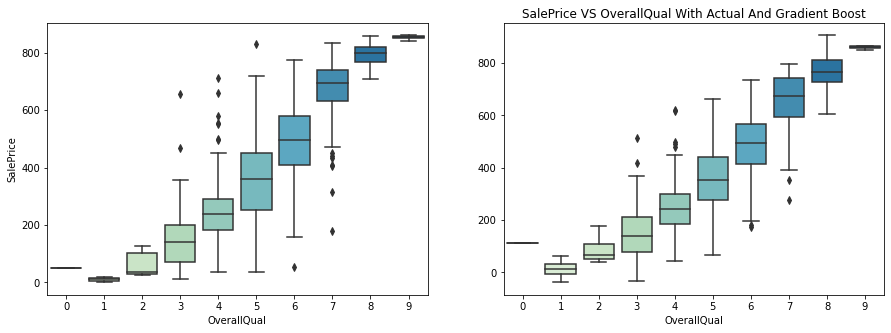

In [50]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
plt.title('SalePrice VS OverallQual With Actual And Gradient Boost')
sns.boxplot(ax = axes[0], x = round(X_test['OverallQual'], 2), y = y_test, palette='GnBu')
sns.boxplot(ax = axes[1], x = round(X_test['OverallQual'], 2), y = gbm_predictions, palette='GnBu')
plt.show()

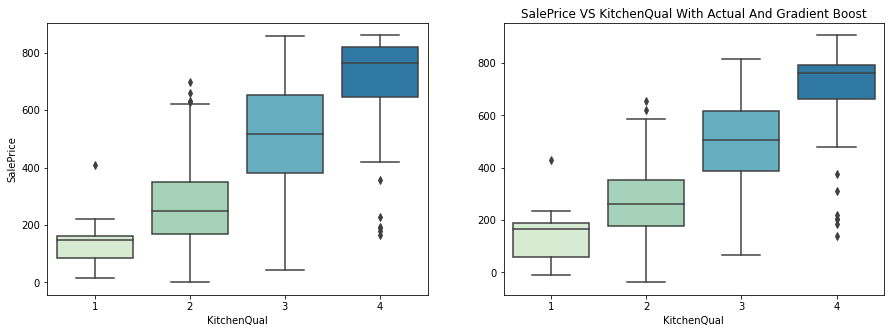

In [51]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
plt.title('SalePrice VS KitchenQual With Actual And Gradient Boost')
sns.boxplot(ax = axes[0], x = round(X_test['KitchenQual'], 2), y = y_test, palette='GnBu')
sns.boxplot(ax = axes[1], x = round(X_test['KitchenQual'], 2), y = gbm_predictions, palette='GnBu')
plt.show()

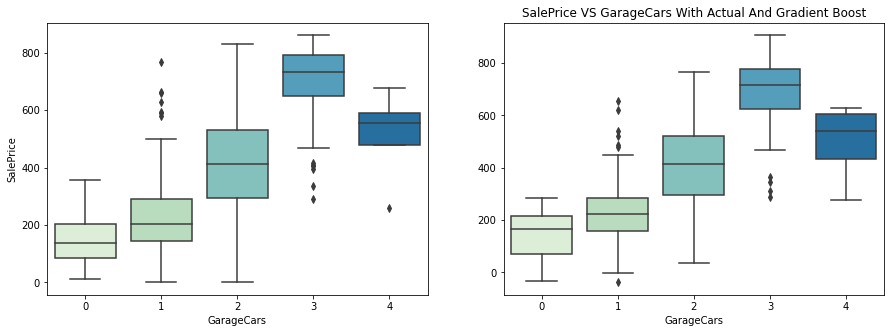

In [52]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
plt.title('SalePrice VS GarageCars With Actual And Gradient Boost')
sns.boxplot(ax = axes[0], x = round(X_test['GarageCars'], 2), y = y_test, palette='GnBu')
sns.boxplot(ax = axes[1], x = round(X_test['GarageCars'], 2), y = gbm_predictions, palette='GnBu')
plt.show()

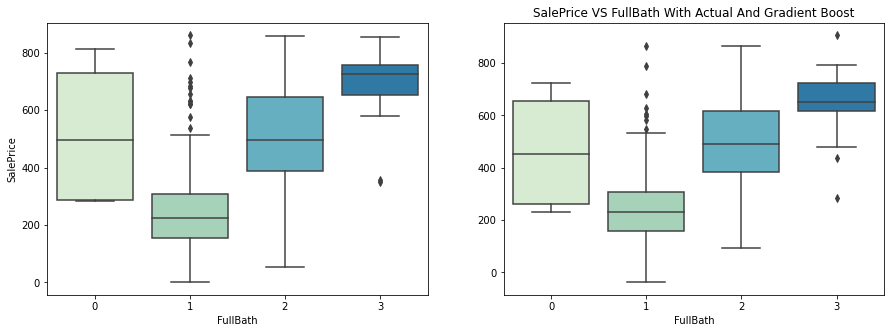

In [53]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
plt.title('SalePrice VS FullBath With Actual And Gradient Boost')
sns.boxplot(ax = axes[0], x = round(X_test['FullBath'], 2), y = y_test, palette='GnBu')
sns.boxplot(ax = axes[1], x = round(X_test['FullBath'], 2), y = gbm_predictions, palette='GnBu')
plt.show()

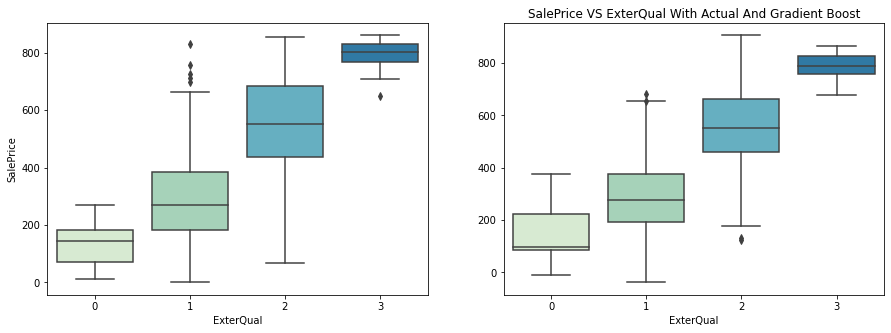

In [54]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
plt.title('SalePrice VS ExterQual With Actual And Gradient Boost')
sns.boxplot(ax = axes[0], x = round(X_test['ExterQual'], 2), y = y_test, palette='GnBu')
sns.boxplot(ax = axes[1], x = round(X_test['ExterQual'], 2), y = gbm_predictions, palette='GnBu')
plt.show()

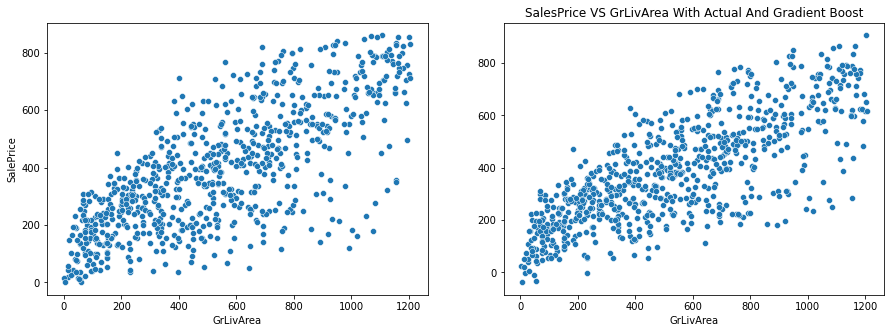

In [55]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
plt.title('SalesPrice VS GrLivArea With Actual And Gradient Boost')
sns.scatterplot(ax = axes[0], x = X_test['GrLivArea'], y = y_test)
sns.scatterplot(ax = axes[1], x = X_test['GrLivArea'], y = gbm_predictions)
plt.show()

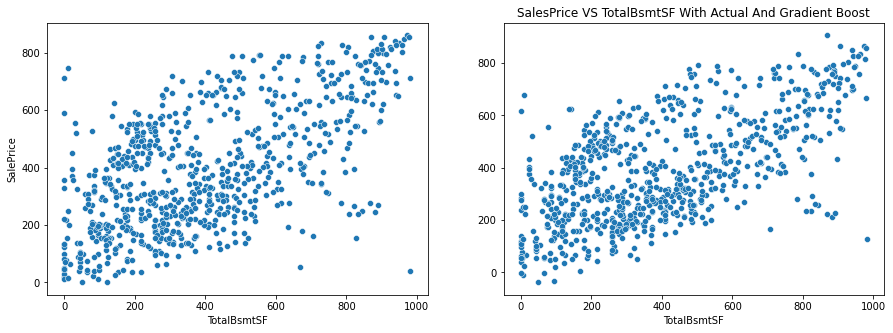

In [56]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
plt.title('SalesPrice VS TotalBsmtSF With Actual And Gradient Boost')
sns.scatterplot(ax = axes[0], x = X_test['TotalBsmtSF'], y = y_test)
sns.scatterplot(ax = axes[1], x = X_test['TotalBsmtSF'], y = gbm_predictions)
plt.show()

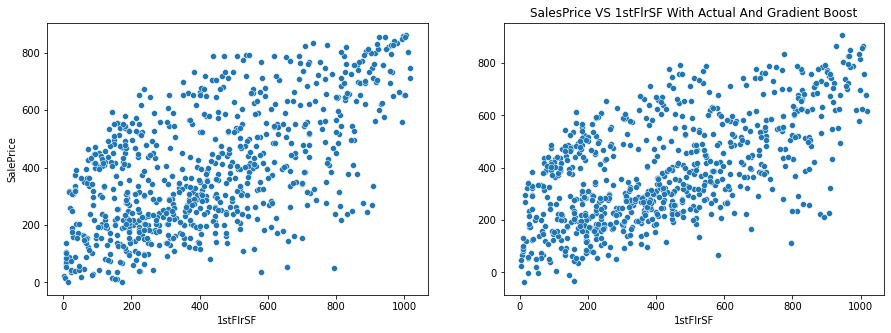

In [57]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
plt.title('SalesPrice VS 1stFlrSF With Actual And Gradient Boost')
sns.scatterplot(ax = axes[0], x = X_test['1stFlrSF'], y = y_test)
sns.scatterplot(ax = axes[1], x = X_test['1stFlrSF'], y = gbm_predictions)
plt.show()

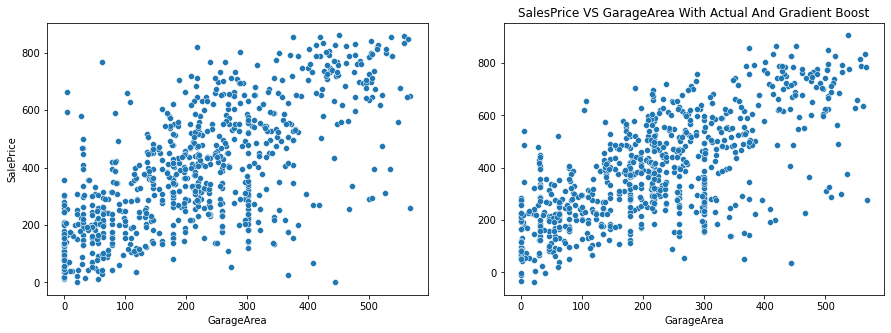

In [58]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
plt.title('SalesPrice VS GarageArea With Actual And Gradient Boost')
sns.scatterplot(ax = axes[0], x = X_test['GarageArea'], y = y_test)
sns.scatterplot(ax = axes[1], x = X_test['GarageArea'], y = gbm_predictions)
plt.show()

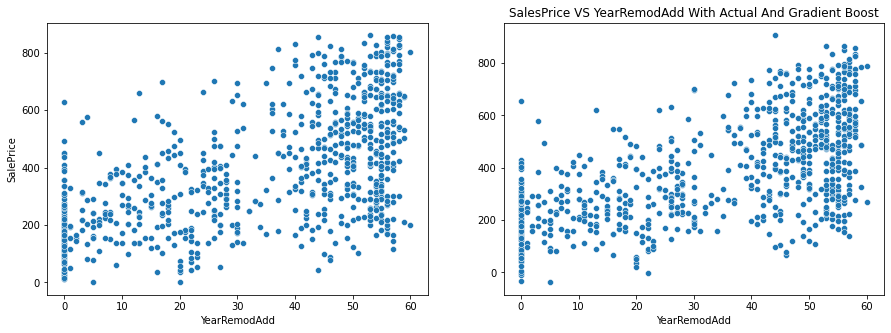

In [59]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
plt.title('SalesPrice VS YearRemodAdd With Actual And Gradient Boost')
sns.scatterplot(ax = axes[0], x = X_test['YearRemodAdd'], y = y_test)
sns.scatterplot(ax = axes[1], x = X_test['YearRemodAdd'], y = gbm_predictions)
plt.show()

**Gradient Boost Feature Importance Top 10:**

'GrLivArea': 9.74,

'ExterQual': 7.92,

'KitchenQual': 7.79,

'GarageCars': 7.52,

'OverallQual': 6.69,

'YearBuilt': 5.71,

'FullBath': 4.65,

'GarageArea': 4.57,

'TotalBsmtSF': 4.56,

'Fireplaces': 3.69

In [61]:
X_cols = list(X.columns)
imp_dict = {}

for i, f in zip(X_cols, tuned_gbm.feature_importances_):
  imp_dict[i] = round(f * 100, 2)

imp_dict_sorted = {k: v for k, v in sorted(imp_dict.items(), key = lambda item: item[1], reverse = True)}

In [62]:
import itertools

imp_dict_top_10 = dict(itertools.islice(imp_dict_sorted.items(), 10))
imp_dict_top_10

{'GrLivArea': 9.74,
 'ExterQual': 7.92,
 'KitchenQual': 7.79,
 'GarageCars': 7.52,
 'OverallQual': 6.69,
 'YearBuilt': 5.71,
 'FullBath': 4.65,
 'GarageArea': 4.57,
 'TotalBsmtSF': 4.56,
 'Fireplaces': 3.69}

<BarContainer object of 10 artists>

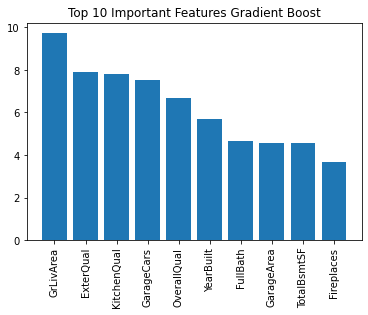

In [63]:
plt.title('Top 10 Important Features Gradient Boost')
plt.xticks(rotation = 90)
plt.bar(imp_dict_top_10.keys(), imp_dict_top_10.values())

In [66]:
#tt_gbm = TransformedTargetRegressor(regressor = ensemble.GradientBoostingRegressor(), func = np.log, inverse_func = np.exp)
#tt_gbm.fit(X_train, y_train)
gbm = ensemble.GradientBoostingRegressor()
gbm.fit(X_train, y_train)

GradientBoostingRegressor()

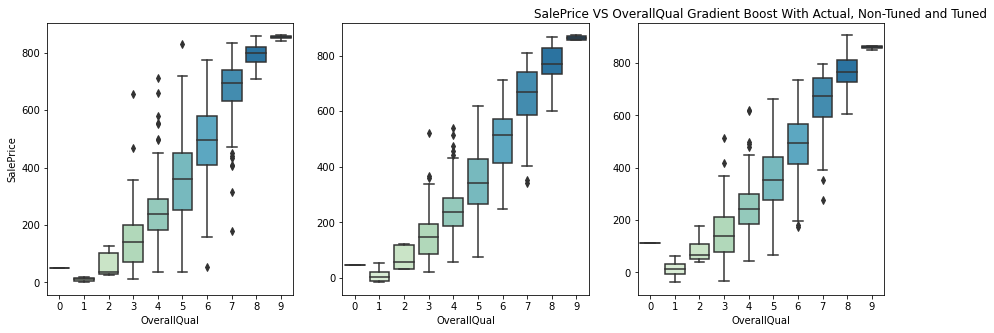

In [67]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
plt.title('SalePrice VS OverallQual Gradient Boost With Actual, Non-Tuned and Tuned')
sns.boxplot(ax = axes[0], x = round(X_test['OverallQual'], 2), y = y_test, palette='GnBu')
sns.boxplot(ax = axes[1], x = round(X_test['OverallQual'], 2), y = gbm.predict(X_test), palette='GnBu')
sns.boxplot(ax = axes[2], x = round(X_test['OverallQual'], 2), y = gbm_predictions, palette='GnBu')
plt.show()

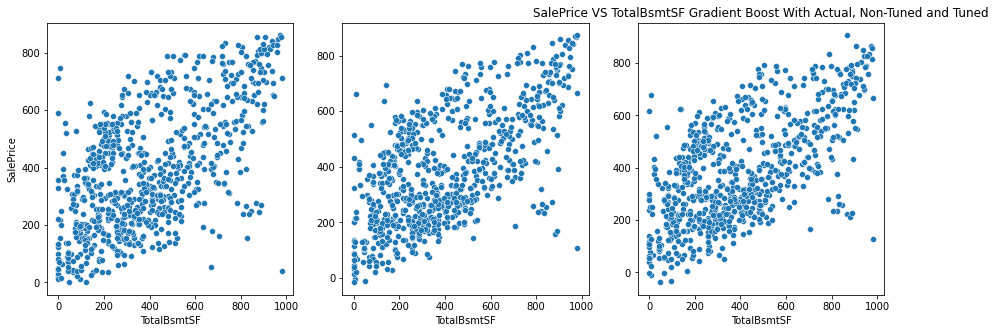

In [68]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
plt.title('SalePrice VS TotalBsmtSF Gradient Boost With Actual, Non-Tuned and Tuned')
sns.scatterplot(ax = axes[0], x = X_test['TotalBsmtSF'], y = y_test)
sns.scatterplot(ax = axes[1], x = X_test['TotalBsmtSF'], y = gbm.predict(X_test))
sns.scatterplot(ax = axes[2], x = X_test['TotalBsmtSF'], y = gbm_predictions)
plt.show()

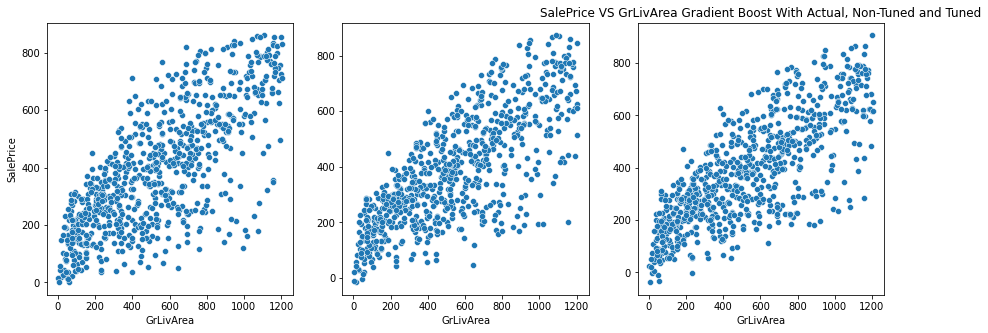

In [69]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
plt.title('SalePrice VS GrLivArea Gradient Boost With Actual, Non-Tuned and Tuned')
sns.scatterplot(ax = axes[0], x = X_test['GrLivArea'], y = y_test)
sns.scatterplot(ax = axes[1], x = X_test['GrLivArea'], y = gbm.predict(X_test))
sns.scatterplot(ax = axes[2], x = X_test['GrLivArea'], y = gbm_predictions)
plt.show()

In [70]:
len(X.columns)

68